In [1]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from konlpy.tag import Okt
from collections import Counter
from IPython.display import set_matplotlib_formats
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

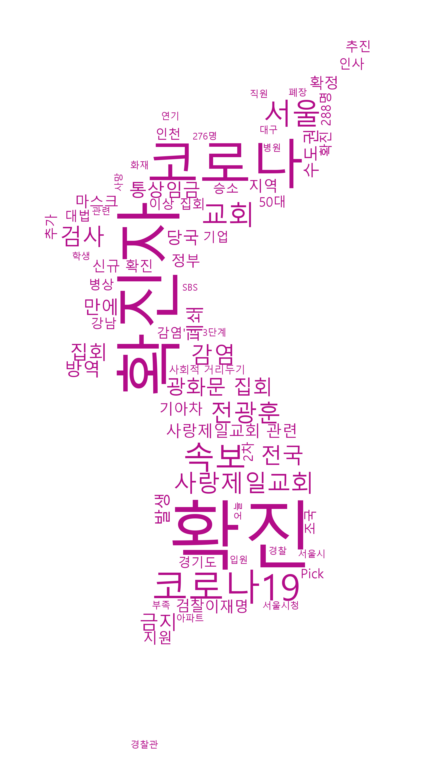

In [2]:
# 갖고있는 파일.
txt_save_list = ['정치.txt', '경제.txt', '사회.txt', '국제.txt', '생활&문화.txt', '연예.txt', '스포츠.txt']

# 갖고있는 파일 하나 불러서 wordcloud 해본거(단어선별 없이).
news_list=[]
file_1= open(txt_save_list[2], 'r') #사회
news_list = file_1.read()
file_1.close()

# nlpy = Okt()
# nouns_list = nlpy.nouns(news_list)

# news_words = []
# for i in nouns_list:
#     if len(i) ==1:
#         continue
#     else:
#         news_words.append(i)

# count = Counter(news_words)
# words_rank = count.most_common(100)

# 색 정의해주는 함수 구현.

def make_colors(word, font_size, position, orientation, random_state, **kwargs):
    # 랜덤수로 색 주는거
#     r = random_state.randint(0, 255)
#     g = random_state.randint(0, 255)
#     b = random_state.randint(0, 255)
#     color = "rgb(%d, %d, %d)" %(r, g, b)
    # 단색
    color = "rgb(179, 12, 137)"
    
    return color


plt.figure(figsize=(13,10), dpi = 100)

mask2 = np.array(Image.open("korea.png"))
font_path = 'C:/Windows/Fonts/malgun.ttf';

wc = WordCloud(font_path = font_path, background_color = "#ffffff", 
    width=800, height=600, mask = mask2, max_words =70)

gen = wc.generate(news_list)
recolor_word = gen.recolor(color_func = make_colors, random_state=True)

plt.axis('off')
plt.imshow(recolor_word, interpolation='bilinear')
plt.show()

In [3]:
# 갖고있는 파일
txt_file_list = [
    'a1.txt', 'a2.txt', 'a3.txt', 'a4.txt', 'a5.txt',
    'b1.txt', 'b2.txt', 'b3.txt', 'b4.txt', 'b5.txt',
    'c1.txt', 'c2.txt', 'c3.txt', 'c4.txt', 'c5.txt',
    'd1.txt', 'd2.txt', 'd3.txt', 'd4.txt', 'd5.txt',
    'e1.txt', 'e2.txt', 'e3.txt', 'e4.txt', 'e5.txt',
    'f1.txt', 'f2.txt', 'f3.txt', 'f4.txt', 'f5.txt',
    'g1.txt', 'g2.txt', 'g3.txt', 'g4.txt', 'g5.txt' 
]

name_list = ['SBS', 'JTBC', 'YTN', 'MBN', 'ASIA']

# 언론사별로 뉴스리스트 전체 카테고리 단어추출해서 합치기.
title_words ={
    'SBS' : [],
    'JTBC' : [],
    'YTN' : [],
    'MBN' : [],
    'ASIA': []
}

okt = Okt()
for i in range(5):
    for j in range(7):
        if j*5 + i==27 or j*5 + i==34:
            continue
        elif j*5+i in [3,8,13,18,23,28,33]:
            News_file = open(txt_file_list[j*5+i], 'r', encoding='UTF-8')

        else:
            News_file = open(txt_file_list[j*5+i], 'r')
            
        News_list = News_file.read()
        nouns_list = okt.nouns(News_list)
        
        # 한 단어 지우기
        temp_words = []
        for word in nouns_list:
            if len(word)>1:
                temp_words.append(word)

        title_words[name_list[i]].extend(temp_words) # append로 하면 오류남.
        
        News_file.close()

#         # MBN 실행 안되서 제외시킴
#         if j*5+i==27 or j*5+i==34 or (j*5+i in [3,8,13,18,23,28,33]):
#             continue
#         else:
#             News_file = open(txt_file_list[j*5+i], 'r')
#             News_list = News_file.read()
#             nouns_list = okt.nouns(News_list)
#             title_words[name_list[i]].extend(nouns_list)
#             News_file.close()

# for news in title_words:
#     print(len(title_words[news]))

# 언론사 단어별 순위 카운트 리스트로 저장하기.
news_words_rank = {
    'SBS' : [],
    'JTBC' : [],
    'YTN' : [],
    'MBN' : [],
    'ASIA': []
}

for i in range(5):
    count = Counter(title_words[name_list[i]])
    news_words_rank[name_list[i]] = count.most_common(90)
    print(name_list[i], len(news_words_rank[name_list[i]]))

SBS 90
JTBC 90
YTN 90
MBN 90
ASIA 90


In [4]:
import pandas as pd

In [5]:
# # list 1 row 형태라서 array 해줘야 하는 줄 알았는데 아니였음.
# for i in range(5):
#     if i==3:
#         pass
#     else:
#         np.array( news_words_rank[name_list[i]] )

# 바로 수평으로 붙여서 array 만들어줌.
total=np.hstack([news_words_rank['SBS'],
                 news_words_rank['JTBC'],
                 news_words_rank['YTN'],
                 news_words_rank['MBN'],
                 news_words_rank['ASIA']])

News_keywords=pd.DataFrame(
    total, 
    columns = ['키워드s', 'SBS','키워드j', 'JTBC','키워드y', 'YTN','키워드m', 'MBN' ,'키워드a', 'ASIA'],
    index = list(range(1,91))
)

News_keywords.head(20)

,키워드s,SBS,키워드j,JTBC,키워드y,YTN,키워드m,MBN,키워드a,ASIA
1,코로나,30,확진,20,코로나,41,코로나,26,코로나,59
2,확진,26,코로나,19,확진,35,확진,10,속보,27
3,감염,12,집회,16,집회,23,레이더,10,확진,20
4,집회,11,교회,11,교회,20,김정은,8,지원,19
5,진자,10,뉴스,10,진자,20,사과,8,교회,18
6,교회,10,광화문,10,광화문,17,대통령,7,서울,17
7,격리,8,감염,10,사랑,14,전광훈,7,진자,16
8,영상,8,전광훈,9,인천,13,민주당,7,집회,15
9,서울,8,검사,9,서울,11,발의,7,사랑,15
10,사랑,7,사랑,8,중단,10,송영길,7,종합,12


### 시각화

In [6]:
try:
    import seaborn as sns
except ImportError as e:
    !pip install seaborn
    import seaborn as sns
    
# 맷플롯립 한글 폰트 지정
import platform
from matplotlib import font_manager, rc

# 한글 설정시 마이너스 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    # mac
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    # windows
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

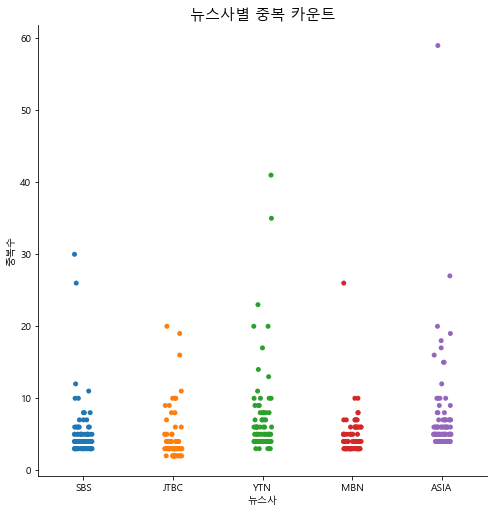

In [7]:
dot_data = sns.catplot(data=News_keywords)
plt.title("뉴스사별 중복 카운트", size=15)
plt.xlabel('뉴스사') # x축
plt.ylabel('중복수') # y축
dot_data.fig.set_size_inches(7,7) 

In [8]:
# SBS 키워드 랭킹 순서로 다른 뉴스사 순서 변경하고, 중복수도 순서대로 저장.

keywords_count_data = {
    'SBS' : '',
    'JTBC' : '',
    'YTN' : '',
    'MBN' : '',
    'ASIA' : '' 
}
sbs_keywords = []

for news in news_words_rank:
    count_temp=[]
    
    if news == 'SBS':
        for i in news_words_rank[news]:
            sbs_keywords.append(i[0])
            count_temp.append(i[1])
            # SBS 랭킹 20위까지의 단어를 다른 뉴스사가 갖고있지 않을 수 있어서 제한을 줌.
            if len(count_temp) == 20:
                break

    else:
        for word in news_words_rank['SBS']:
            for i in news_words_rank[news]:
                
                # SBS 키워드랑 일치하는것을 찾으면 count_temp에 추가.
                if word[0] == i[0]:
                    count_temp.append(i[1])
            
            if len(count_temp) == 20:
                break
    
    keywords_count_data[news] = count_temp

# 20개씩 잘 들어갔는지 확인
for i in keywords_count_data:
    print(i ,len(keywords_count_data[i]))

SBS 20
JTBC 20
YTN 20
MBN 20
ASIA 20


In [9]:
df_news_rank_data=pd.DataFrame(keywords_count_data, index=sbs_keywords)
df_news_rank_data

,SBS,JTBC,YTN,MBN,ASIA
코로나,30,19,41,26,59
확진,26,20,35,10,20
감염,12,10,9,6,9
집회,11,16,23,4,15
진자,10,7,20,4,16
교회,10,11,20,5,18
격리,8,2,11,4,17
영상,8,6,14,4,15
서울,8,8,9,6,27
사랑,7,3,10,5,8


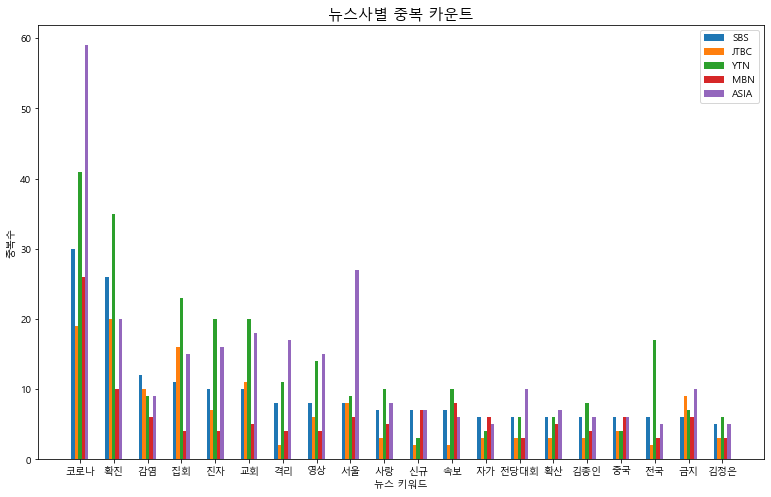

In [10]:
news_name = list(df_news_rank_data.columns) # ['SBS', 'JTBC', 'YTN', 'MBN', 'ASIA']

index=np.arange(len(df_news_rank_data.index)) # 키워드를 바로 x축으로 잡으면, 위치선정할때 +0.2가 불가능.

plt.figure(figsize = (13, 8))
plt.bar(index-0.2, df_news_rank_data['SBS'], width = 0.1, label='SBS')
plt.bar(index-0.1, df_news_rank_data['JTBC'], width = 0.1, label='JTBC')
plt.bar(index, df_news_rank_data['YTN'], width = 0.1, label='YTN')
plt.bar(index+0.1, df_news_rank_data['MBN'], width = 0.1, label='MBN')
plt.bar(index+0.2, df_news_rank_data['ASIA'], width = 0.1, label='ASIA')

plt.xticks(index, df_news_rank_data.index) # x축 생성, data_2_index로 입히기.
plt.legend()
plt.xlabel('뉴스 키워드') # x축
plt.ylabel('중복수') # y축
plt.title("뉴스사별 중복 카운트", size=15)
plt.show()

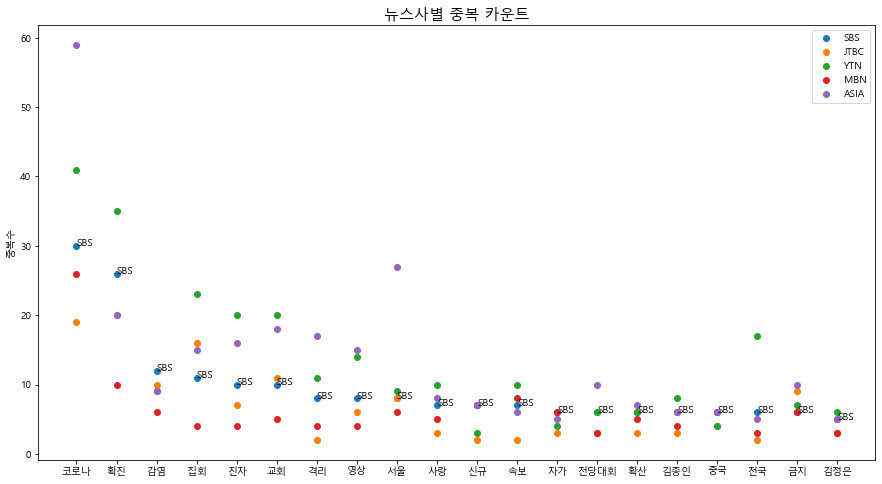

In [11]:
# keywords_count_data를 바로  scatter 그래프 그리기

news_name = list(keywords_count_data.keys()) #['SBS', 'JTBC', 'YTN', 'MBN', 'ASIA']
news_keywords = sbs_keywords

plt.figure(figsize = (15, 8))

for news in news_name:
    plt.scatter(news_keywords, keywords_count_data[news], label=news)

plt.legend()
plt.xticks(index, sbs_keywords) # x축 생성, sbs_keywords로 입히기.
plt.ylabel('중복수')
plt.title("뉴스사별 중복 카운트", size=15)

for x, y in zip(index, keywords_count_data['SBS']):
    plt.text(x, y, 'SBS')

plt.show()

In [12]:
# 갖고있는 파일.
txt_save_list = ['정치.txt', '경제.txt', '사회.txt', '국제.txt', '생활&문화.txt', '연예.txt', '스포츠.txt']